# TITANIC

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('D:/csv/titanic/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
def transformar(valor):
    if valor == 'female':
        return 1
    else:
        return 0
    
train['Sex_bin'] = train['Sex'].map(transformar)

In [7]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_bin          0
dtype: int64

In [9]:
variaveis = ['Sex_bin', 'Age', 'Pclass', 'Parch', 'SibSp', 'Fare']
X = train[variaveis].fillna(-1)
y = train['Survived']

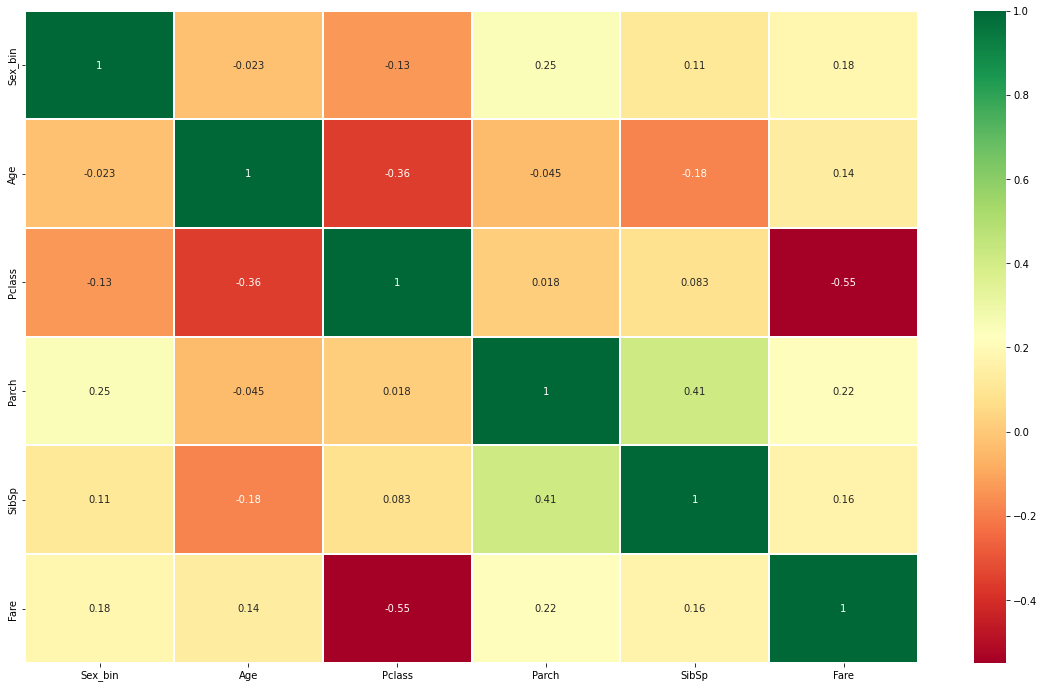

In [21]:
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

### Criando o modelo de ML - Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 0)

### Validação Cruzada

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 15

seed =17

kf = KFold(num_folds, shuffle = True, random_state = seed)

score = cross_val_score(modelo, X, y, cv = kf)

In [25]:
print(score.mean()*100)

82.06967984934087
